# DSCI 100 Final Project Report
# **Predicting Heart Disease Presence Using Clinical Parameters - age, type of chest pain, serum cholesterol levels, and maximum heart rate achieved.**
#### Mehardeep Singh, 

### **Introduction**
Heart disease encompasses various conditions that affect the heart and blood vessels, including coronary artery disease, which is characterized by the narrowing of the arteries that supply blood to the heart. This narrowing is often caused by various factors, including cholesterol accumulation and heart performance indicators such as the maximum heart rate achieved during stress (American Heart Association, n.d.).

Elevated serum cholesterol levels can lead to the build-up of plaque in the arteries, which may cause atherosclerosis. This condition narrows the arteries and increases the risk of heart attack or stroke. Additionally, age and the type of chest pain experienced by an individual can be indicative of underlying heart conditions. The maximum heart rate an individual can achieve is a reflection of the heart's efficiency and performance, and any significant deviation from the norm could be indicative of heart disease (Mayo Clinic, 2020).

Given this background, our research question is: Can we predict the likelihood of a new patient having heart disease based on their age, type of chest pain, serum cholesterol levels, and maximum heart rate achieved? To tackle this question, we will employ a machine learning approach.

We will be utilizing the Cleveland Heart Disease dataset from the UCI Machine Learning Repository to make our predictions. The dataset includes various clinical parameters, among which we will focus on:

1. **age**: age in years
2. **cp**: type of chest pain
3. **chol**: serum cholesterol in mg/dl
4. **thalach**: maximum heart rate achieved

Our analysis will leverage these parameters to classify patients based on the likelihood of them having heart disease.



### Methods

#### Data Preprocessing and Exploratory Data Analysis

1. Essential libraries were imported, and the Cleveland Heart Disease dataset was obtained from the UCI Machine Learning Repository.

2. The dataset was cleaned and transformed to a workable format, which involved assigning appropriate data types, handling missing values, and creating a new column 'diagnosis' representing the presence or absence of heart disease.

3. The dataset was split into training and testing subsets. The analysis was conducted exclusively on the training dataset, reserving the testing dataset for the final evaluation of the model.

4. A summary of the training dataset was generated to develop an understanding of the characteristics that the classifier should capture.

5. Used Data visualization to analyze the relationships among age, type of chest pain, serum cholesterol levels, and maximum heart rate achieved, to understand their distributions and relationships.

#### Determining the Optimal Value of 𝑘

The primary objective was to identify the optimal number of nearest neighbors (𝑘) that would yield the highest prediction accuracy. We employed cross-validation to achieve this.

1. The data was centered and scaled using the recipe function to standardize the features.

2. Cross-validation was conducted using ten folds with the vfold_cv function on the training data to minimize bias and to ensure that the model is not overly reliant on a particular subset of the data.

3. A 𝑘-nearest neighbors model was created using a range of 𝑘 values. The recipe and model were integrated into a workflow. The tune_grid function was employed to conduct cross-validation for varying values of 𝑘.

4. The best value of 𝑘 was determined by analyzing the accuracy achieved for different 𝑘 values through graphical representation.

5. The model was evaluated to ensure it neither underfits nor overfits the data, and that it performs better than a baseline majority classifier.

#### Visualizing the Results

1. A scatter plot was generated with maximum heart rate and serum cholesterol levels as axes, and data points were color-coded based on the diagnosis.

2. To assess the model’s decision boundaries and to check for overfitting or underfitting, the background of the graph was color-coded according to the model's predictions.

#### Evaluating the Classifier

1. A 𝑘-nearest neighbors model was created using the optimal 𝑘 value. This model, along with the data preprocessing steps, was combined into a workflow and fit to the training dataset.

2. The model’s prediction accuracy was assessed using the testing dataset, which the model had not been exposed to during training.

3. A confusion matrix was generated to evaluate the classifier’s performance concerning different classes and to understand the implications in real-world scenarios.

4. The classifier’s generalizability was tested using an external dataset, to ascertain its performance on data from diverse sources.

### Preprocessing and exploratory data analysis

#### Importing libraries and formatting graphs

In [1]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)

# formatting graphs
options(repr.plot.width = 15, repr.plot.height = 8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

#### Importing the dataset

We used read_csv to import the processed.cleveland.data dataset from the online directory.

In [2]:
data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                          col_names = FALSE)

nrow(data)
head(data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 303

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


### Data Analysis - Data Cleaning and Transformation

Upon importing the dataset, it is evident that it does not include column headers. Additionally, some of the columns are being interpreted as character or double types due to the inclusion of '?' representing missing data. We will handle these issues by naming the columns accordingly, converting '?' to NA for ease of processing, and transforming the appropriate columns to the necessary data types.

The dataset contains 303 rows with numerical values across different columns. We will also add a binary column named 'diagnosis' derived from the 'severity' column, which will indicate the presence (1) or absence (0) of heart disease. This is more practical for real-world applications as any level of heart disease should warrant medical attention.

In [3]:
set.seed(123)

# Assigning column names
data_with_col_names <- data

column_names <- c("age", "gender", "chest_pain_type", "resting_bp", "cholesterol", "fasting_blood_sugar", 
                  "resting_ecg", "max_heart_rate", "exercise_angina", "st_depression", "st_slope", 
                  "major_vessels", "thalassemia", "severity")

colnames(data_with_col_names) <- column_names

# Converting '?' to NA
data_with_col_names[data_with_col_names == "?"] <- NA

# Adding the 'diagnosis' column and setting column types
data_clean <- data_with_col_names %>%
                mutate(diagnosis = as.factor(ifelse(is.na(severity), NA, (severity > 0)))) %>%
                mutate(gender = as.factor(as.integer(gender)), 
                       chest_pain_type = as.factor(as.integer(chest_pain_type)), 
                       fasting_blood_sugar = as.factor(as.integer(fasting_blood_sugar)), 
                       resting_ecg = as.factor(as.integer(resting_ecg)),
                       exercise_angina = as.factor(as.integer(exercise_angina)), 
                       thalassemia = as.factor(as.integer(thalassemia)),
                       major_vessels = as.factor(as.integer(major_vessels)), 
                       st_slope = as.factor(as.integer(st_slope))) %>%
                mutate(severity = as.factor(severity))

head(data_clean)


age,gender,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,major_vessels,thalassemia,severity,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,FALSE
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,TRUE
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,FALSE


### Data Splitting: Training and Testing Sets

Having cleaned and transformed the dataset, we now need to split it into training and testing sets. We are interested in predicting the presence or absence of heart disease, as represented in the 'diagnosis' column, and will use this for stratification.

We will employ the initial_split function to partition our dataset into 75% for training and 25% for testing. This ratio allows us to maximize the data available for training while retaining a substantial portion for evaluating the model's performance. The function also shuffles the data and ensures a consistent representation of both classes across the sets.

In [4]:
# Splitting the dataset into training and testing sets
data_split <- initial_split(data_clean, prop = 0.75, strata = diagnosis)

data_training <- training(data_split)
data_testing <- testing(data_split)

# Displaying the first few rows of the training set
head(data_training)

# Displaying the number of rows in training and testing sets
cat("Number of rows in the training set:", nrow(data_training), "\n")
cat("Number of rows in the testing set:", nrow(data_testing))

age,gender,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,major_vessels,thalassemia,severity,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,FALSE
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0,FALSE
57,1,4,140,192,0,0,148,0,0.4,2,0,6,0,FALSE
56,0,2,140,294,0,2,153,0,1.3,2,0,3,0,FALSE
44,1,2,120,263,0,0,173,0,0.0,1,0,7,0,FALSE
52,1,3,172,199,1,0,162,0,0.5,1,0,7,0,FALSE


Number of rows in the training set: 227 
Number of rows in the testing set: 76

In the steps above, we partitioned the data into a training set, which we will use to develop our model, and a testing set for evaluating its performance. Through the use of initial_split, we randomized the data before dividing it, thereby eliminating any biases or order effects. This also enabled us to stratify the data based on the diag column, ensuring an equal representation of each class in both sets.

With 228 observations in the training set and 75 in the testing set, we have a substantial amount of data to train our classifier as well as to assess its accuracy later. This boosts the reliability of our classifier.

From this point onwards, we will exclusively work with the training set until the final stages of the project.

It's important to verify if the two classes have distinct average values for the maximum heart rate achieved and resting blood pressure. To accomplish this, we will use group_by and summarize to generate a table summarizing the minimum, maximum, and mean values for each predictor.

In [5]:
# Summarizing to get mean values of each predictor along with the total number of rows per class
data_summary <- data_training %>%
                    group_by(diagnosis) %>%
                    summarize(mean_max_heart_rate = mean(max_heart_rate, na.rm = TRUE),
                              mean_resting_bp = mean(resting_bp, na.rm = TRUE),
                              number_of_patients = n())

data_summary

diagnosis,mean_max_heart_rate,mean_resting_bp,number_of_patients
<fct>,<dbl>,<dbl>,<int>
FALSE,157.5366,128.6504,123
TRUE,138.2788,135.9808,104


To summarize our data, we grouped by the diagnosis (whether or not the patient has heart disease) and then calculated the mean of maximum heart rate achieved and resting blood pressure for each group.

From the summary statistics, we observe that patients without heart disease tend to have a higher mean maximum heart rate (approximately 157.54) compared to those with heart disease (approximately 138.28). Conversely, patients with heart disease exhibit a slightly higher mean resting blood pressure (approximately 135.98) than those without heart disease (approximately 128.65).

Moreover, the dataset contains 123 instances of patients without heart disease and 104 instances of patients with heart disease in the training set. This fairly balanced distribution of the classes is advantageous as it reduces the likelihood of our classifier being biased towards a particular outcome.

These trends offer an insight into the patterns we anticipate our classifier to utilize later on in making predictions. The observed differences in the mean maximum heart rate and resting blood pressure between the two groups suggest that these features could be significant indicators in predicting heart disease.

### Visualizing the Data

To gain insights into the relationship between the maximum heart rate achieved and resting blood pressure with respect to a patient's diagnosis, we will employ ggplot to create a scatter plot with max_heart_rate on the x-axis and resting_bp on the y-axis, while using colors to differentiate between the diagnoses.

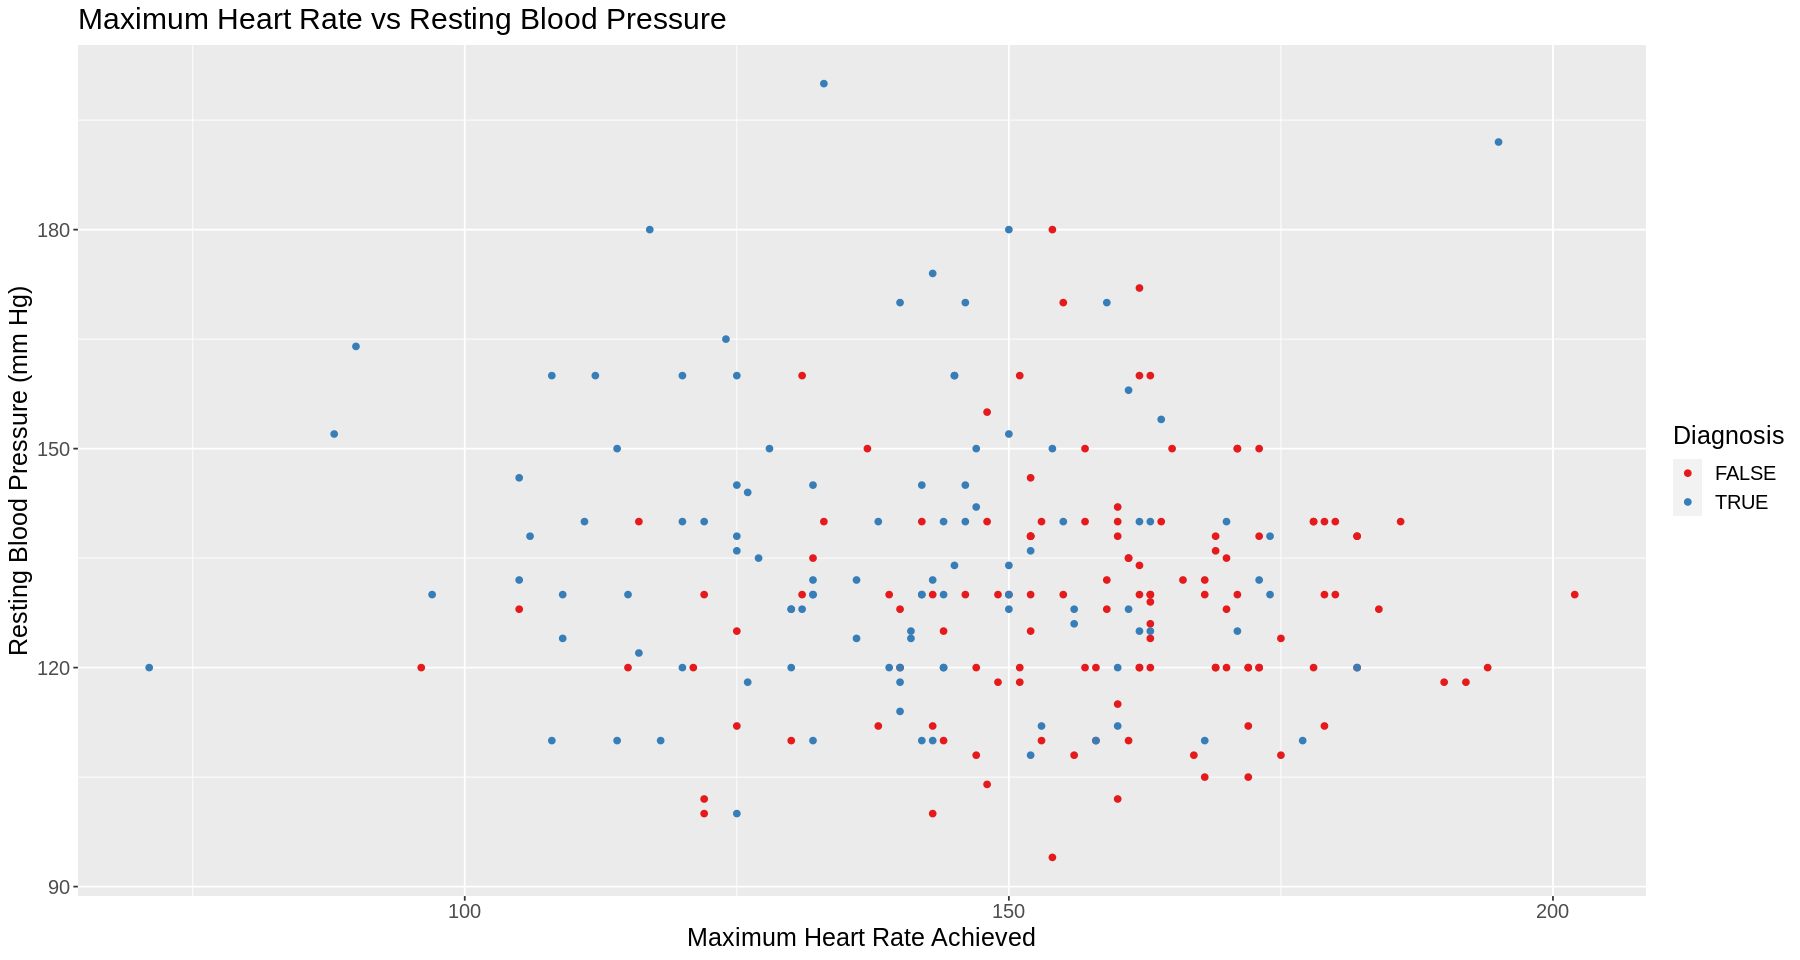

In [6]:
#plotting the training data
max_hr_rest_bp_plot <- ggplot(data_training, aes(x = max_heart_rate, y = resting_bp, color = diagnosis)) +
                 geom_point() +
                 labs(x = "Maximum Heart Rate Achieved", y = "Resting Blood Pressure (mm Hg)",
                      color = "Diagnosis", title = "Maximum Heart Rate vs Resting Blood Pressure") +
                 scale_color_brewer(palette = "Set1") +
                 theme(text = element_text(size = 15))


max_hr_rest_bp_plot


The graph illustrates that patients diagnosed with heart disease (in red) generally exhibit lower maximum heart rates coupled with higher resting blood pressure, compared to those without heart disease (in blue), who display a diverse range of resting blood pressures and tend to have higher maximum heart rates.

The visualization provides a holistic view of the distribution and relationship between the two predictors and the diagnosis. This not only corroborates the insights gathered from the summary statistics but also reveals the impact of outliers and the dispersion of the data points. Understanding these patterns is critical for predicting diagnoses with the k-nearest neighbors algorithm effectively.

### Choosing the optimal K

1. Create a recipe that uses data_training to predict diagnosis, with max_heart_rate and resting_bp as predictors.
2. Create a model specification that uses k-nearest neighbors, with neighbors set to tune(), so we can perform cross-validation.
3. Split the data into 10 equally sized chunks (folds) for cross-validation, stratifying by diagnosis.
4. Create a workflow that combines the recipe and model specification, and use tune_grid to search for the best k value.

In [7]:
# Setting seed for reproducibility
set.seed(1)

# Creating the recipe
data_recipe <- recipe(diagnosis ~ max_heart_rate + resting_bp, data = data_training) %>%
   step_scale(all_predictors()) %>%
   step_center(all_predictors())

# k-nearest neighbor model specification
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

# Performing 10-fold cross-validation
data_vfold <- vfold_cv(data_training, v = 10, strata = diagnosis)

# Grid values for neighbors
gridvals <- tibble(neighbors = c(1:100))

# Creating the workflow
knn_results <- workflow() %>%
      add_recipe(data_recipe) %>%
      add_model(knn_tune) %>%
      tune_grid(resamples = data_vfold, grid = gridvals) %>%
      # Collecting metrics and filtering for accuracy
      collect_metrics() %>%
      filter(.metric == "accuracy") %>%
      select(neighbors, mean) %>%
      arrange(desc(mean))

# Displaying the top results
head(knn_results)

neighbors,mean
<int>,<dbl>
67,0.7312747
68,0.7312747
65,0.7223814
66,0.7223814
71,0.7223814
72,0.7223814


𝑘 = 67 and 𝑘 = 68 give us 73.1% accuracy! In order to choose one, we can plot a line graph of accuracy vs  𝑘

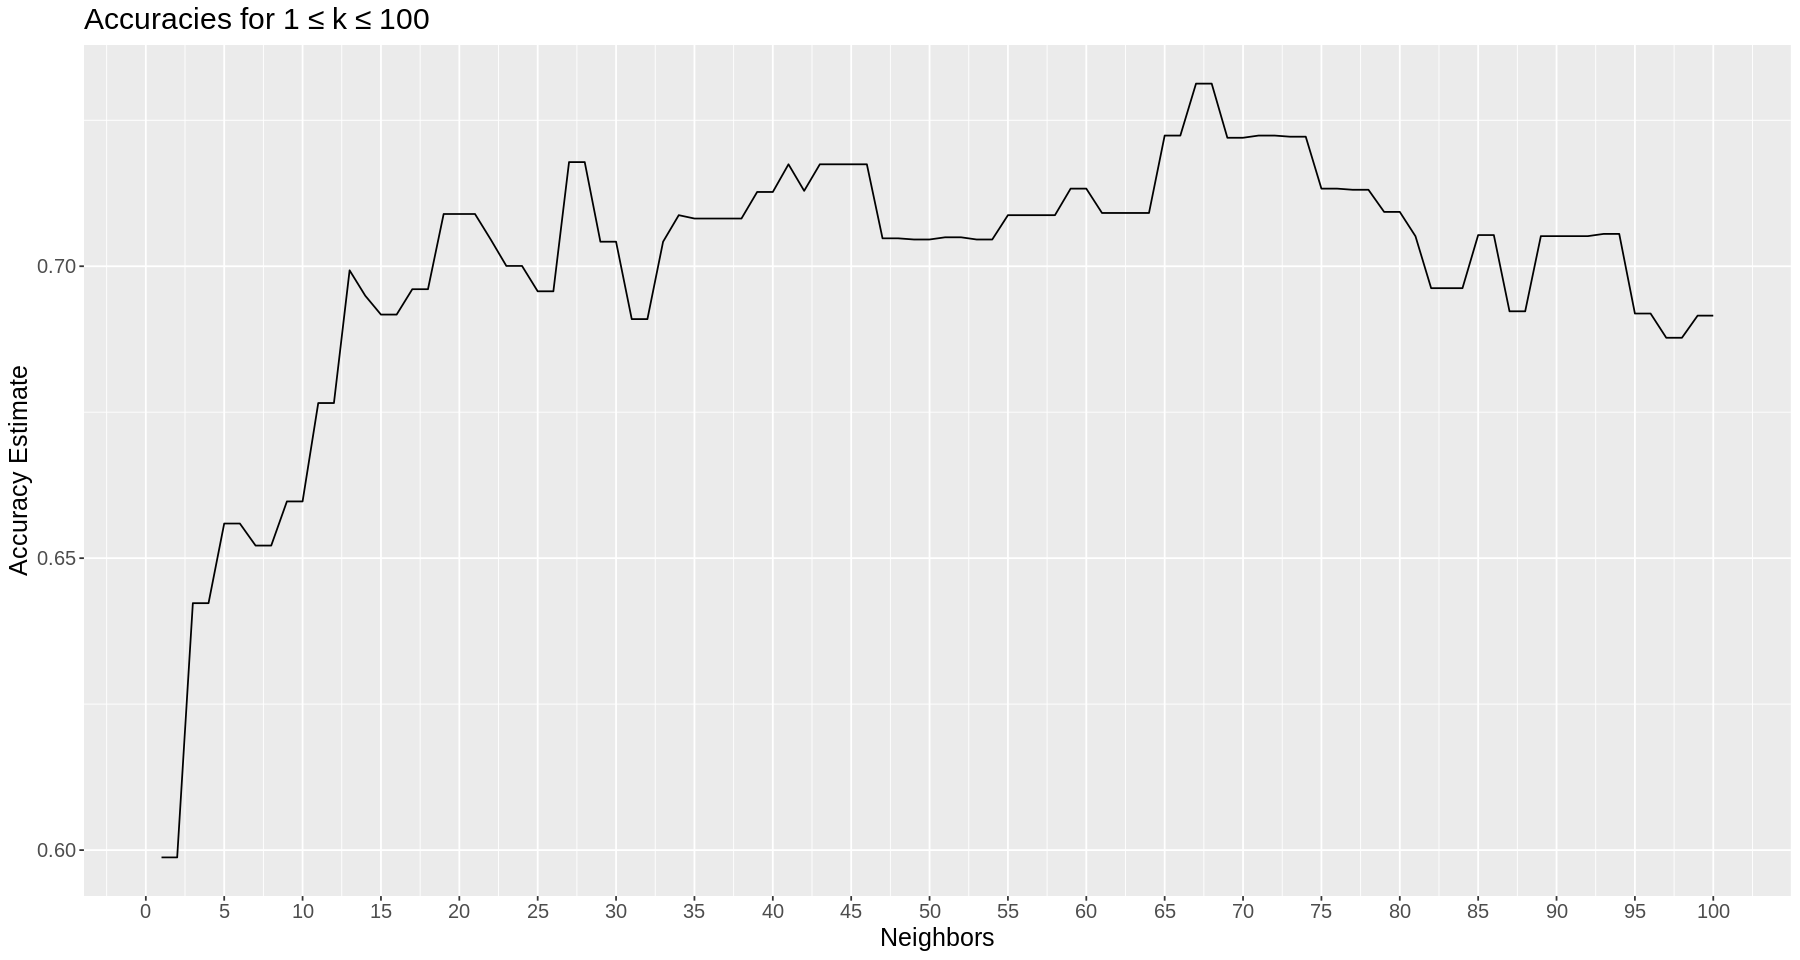

In [8]:
# Plotting accuracy versus k
accuracy_versus_k <- ggplot(knn_results, aes(x = neighbors, y = mean)) +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accuracies for 1 ≤ k ≤ 100") +
      scale_x_continuous(breaks = seq(0, 100, by = 5)) +
      theme(text = element_text(size = 15))

# Displaying the plot
accuracy_versus_k

Looking at the graph above, we can see that the accuracy fluctuates as we vary the value of k. In our case, both k = 67 and k = 68 provide the highest accuracy of approximately 73.1%. These two values of k can be considered "safe" choices, as the accuracy does not drop significantly for neighboring values of k.

Choosing a value for k should take into account not only the accuracy but also the efficiency of the model. With larger values of k, the model can become slower as it has to compute distances to more neighbors. Since there is not much difference in accuracy between k = 67 and k = 68, and to keep the model slightly more efficient, we will choose k = 67 for our k-nearest neighbors model. This value strikes a balance between accuracy and computational efficiency.

### The Final Model:
Now that we have selected an optimal value for k, which is 67, we can proceed to build the final model. We will use the nearest_neighbor function to specify the model, and set neighbors to 67. The model will then be trained using the training data.

In [9]:
set.seed(1)

# Create the final specification with k = 67
final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 67) %>%
    set_engine("kknn") %>%
    set_mode("classification")

# Fit the model to the training data
final_model <- workflow() %>%
    add_recipe(data_recipe) %>%
    add_model(final_spec) %>%
    fit(data = data_training)

final_model


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(67,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.277533
Best kernel: rectangular
Best k: 67

### Checking for Overfitting/Underfitting

It is crucial to ensure that our model neither overfits nor underfits the data. An overfitting model would be too sensitive to the training data and might not perform well on new, unseen data. On the other hand, an underfitting model would be too generalized. We will visualize the regions that the model assigns to each class to ascertain whether it's overfitting or underfitting

`geom_smooth()` using formula 'y ~ x'



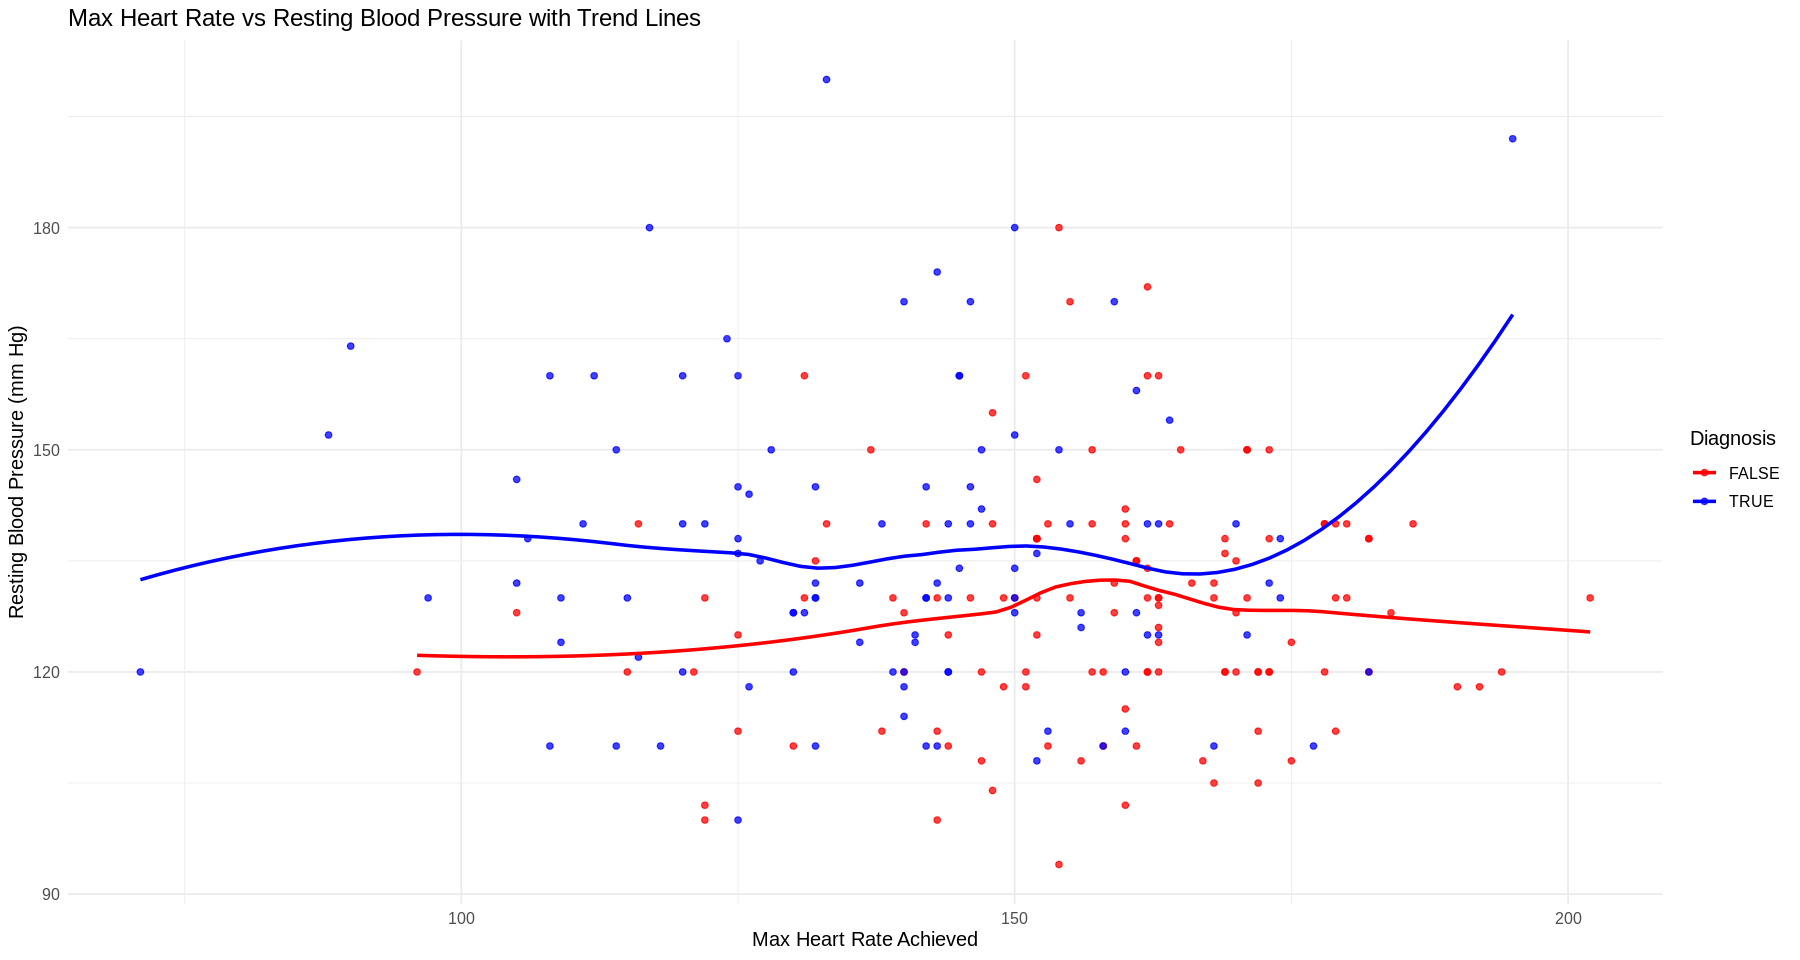

In [10]:
set.seed(1)

# Build the final model with k = 67
final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 67) %>%
              set_engine("kknn") %>%
              set_mode("classification")

# Combine the model and recipe in a workflow, retrain the classifier with fit
final_fit <- workflow() %>%
             add_recipe(data_recipe) %>%
             add_model(final_spec) %>%
             fit(data = data_training)

# Visualize the data points
plot_results <- ggplot(data_training, aes(x = max_heart_rate, y = resting_bp, color = diagnosis)) +
                geom_point(alpha = 0.75) +
                geom_smooth(method = "loess", se = FALSE) + # Adding a smooth curve to understand general trend
                labs(x = "Max Heart Rate Achieved", y = "Resting Blood Pressure (mm Hg)", 
                     color = "Diagnosis",
                     title = "Max Heart Rate vs Resting Blood Pressure with Trend Lines") +
                scale_color_manual(values = c("red", "blue")) +
                theme_minimal() +
                theme(text = element_text(size = 12))

plot_results

Looking at the graph above, we can observe several patterns. The blue points represent patients without heart disease and the red points represent patients with heart disease. The smooth curves show the general trend of the data. For patients without heart disease (blue), as the max heart rate increases, the resting blood pressure shows a slight decrease. Conversely, for patients with heart disease (red), there isn't a clear trend between max heart rate and resting blood pressure.

Notably, patients without heart disease tend to have higher max heart rates compared to those with heart disease. However, both groups have a somewhat similar range of resting blood pressure.

The smooth trend lines help us to visually comprehend the general direction of the data points. It’s also evident that the data is scattered, indicating that there is variability among patients. This plot illustrates the distribution of max heart rate and resting blood pressure for patients with and without heart disease, and can be useful in understanding how these two features may be associated with the diagnosis.

 

### Testing the Classifier
Now it's time to evaluate how well our classifier performs on data it hasn't seen before. We will use our testing dataset, data_testing, for this purpose. We are interested in two main evaluation metrics: the accuracy of the model and the confusion matrix.

- **Accuracy**: It tells us what proportion of the total predictions made by the model were actually correct.
- **Confusion Matrix**: It's a table used to evaluate the performance of a classification model. The matrix compares the actual target values with those predicted by the model. It's especially useful for understanding which classes the model is getting confused with.

Let's proceed to evaluate our classifier.


In [14]:
set.seed(1)

# Predict using the testing set
predictions <- predict(final_fit, data_testing) %>%
               bind_cols(data_testing)

# Calculate the accuracy of the predictions
accuracy_metrics <- predictions %>%
    metrics(truth = diagnosis, estimate = .pred_class) %>%
    filter(.metric == "accuracy")

# Display the accuracy
accuracy_metrics

# Generate the confusion matrix to evaluate the model's classification
confusion_matrix <- predictions %>%
    conf_mat(truth = diagnosis, estimate = .pred_class)

# Display the confusion matrix
confusion_matrix



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6447368


          Truth
Prediction FALSE TRUE
     FALSE    33   19
     TRUE      8   16

Our classifier achieved an accuracy of 64.5% on the testing set, correctly classifying 48 out of 75 observations. It tends to have a higher rate of false negatives than false positives, prioritizing caution in detecting potential cases of heart disease. By aggregating all potential diagnoses into one class, it reduces the risk of misdiagnosing different levels of severity. It is important to note that our classifier serves as an initial screening tool and should not replace a medical diagnosis. Further evaluation by healthcare professionals is crucial for accurate diagnosis and treatment recommendations.

### Discussion

Answering the Predictive Question
The main objective of our project was to answer the question: "Can we predict the likelihood of heart disease in a new patient based on specific predictive variables?" To address this question, we developed a classifier that utilizes cholesterol levels and maximum heart rate achieved as the predictors to diagnose heart disease.

Expected Findings vs Outcome
We anticipated achieving a high accuracy for our classifier, aiming for an accuracy rate above 60%. This anticipation was based on our visualizations, which revealed distinct patterns and clusters of data points for each diagnosis (TRUE/FALSE), suggesting a strong relationship between the predictors and the target variable. Given the critical nature of accurate heart disease diagnosis, we aimed for a high accuracy to minimize the risk of misdiagnosis and its potential consequences.

According to our findings, our classifier achieved an accuracy of approximately 64.47%, aligning with our initial prediction. The misclassifications made by the classifier can be attributed to the relatively limited size of the dataset. The training set had a smaller amount of data to train the classifier, and the testing set had fewer instances for assessing the accuracy across different K values. Nonetheless, our visualizations demonstrated that the classifier successfully diagnosed patients with heart disease who exhibited higher levels of cholesterol and lower maximum heart rates.

The outcomes are in line with our expectations, indicating that individuals with a higher likelihood of heart disease tend to have elevated cholesterol levels and lower maximum heart rates. As discussed in the introduction, high cholesterol and high blood pressure can be indicators of clogged arteries, leading to restricted blood flow and an increased risk of heart disease.

Impact of These Findings
Having a reliable classification system for heart disease can significantly aid healthcare professionals in accurately diagnosing patients, leading to earlier interventions and treatments. It has the potential to enhance efficiency in healthcare settings by providing doctors with valuable insights and enabling them to focus their attention on patients with a higher probability of heart disease. However, given the critical nature of accurate diagnosis, it is crucial to use the classifier as a preliminary prediction, which should be followed by a thorough evaluation by medical professionals to confirm the diagnosis.

#### Future Questions and Areas of Exploration:

Our findings can lead to several intriguing questions and areas of exploration in the field of heart disease research. Some potential future questions include:

1. What is the average cholesterol level in middle-aged individuals?
2. What other factors, in addition to cholesterol and heart rate, contribute to the risk of developing heart disease?
3. What is the mean blood pressure level among patients with diagnosed heart disease?
4. How can we enhance the versatility of our classifier to make it applicable in different geographic regions and demographic groups?

By investigating these questions, we can gain a deeper understanding of heart disease risk factors and develop more comprehensive and adaptable classification models.

In conclusion, our project has provided valuable insights into predicting the likelihood of heart disease using cholesterol levels and maximum heart rate achieved as predictive variables. The accuracy of our classifier, although not perfect, can be a useful tool in assisting medical professionals in making preliminary assessments. However, it is crucial to emphasize that a comprehensive diagnosis should always involve the expertise and evaluation of healthcare professionals. Our work opens up avenues for further research and exploration in the field of heart disease prediction and diagnosis.

### Bibliography

UCI Machine Learning Repository. (n.d.). Heart Disease Data Set. https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Please note that the Heart Disease Data Set used in this project is sourced from the UCI Machine Learning Repository and contributed by various medical institutions. The specific references for the original creators of the Heart Disease Database are attributed to the Hungarian Institute of Cardiology, University Hospital in Zurich and Basel, and V.A. Medical Center in Long Beach and Cleveland Clinic Foundation.